In [28]:
import numpy as np
import matplotlib.pyplot as plt

def FD2(f,x,h): 
    #Calculates FD2 approximation to first derivative
    #'f' is the function whose derivative we're approximating
    #'x' is the point at which we're evaluating the derivative
    #'h' is the grid-spacing we're using for the approximation
    y=(-3*f(x)+4*f(x+h)-f(x+(2*h)))/(2*h)
    return y

#testing
x0=1.
h=0.1 
f=np.exp #sets f as a function f=e^{x}

f1_approx1=FD2(f,x0,h)
# print(f1_approx1)

f1_true=np.exp(x0) #derivative of f=e^{x} is f'=e^{x}
# print(f1_true) 

err=abs(f1_true-f1_approx1)/abs(f1_true)
print('The error of the FD2 approximation is ',err)

The error of the FD2 approximation is  0.003595429287894097


Since FD2 is an $\mathcal{O}(h^{2})$ scheme, and we see that our resulting error $0.00359$ is in line with a first order error with $h=0.1$.

Answer of Question 2:

To find the coefficients of five-point FDF, we need to write 5x5 matrix with taylor series coefficients and a result matrix with 1 for f'. Here is the solution by using numpy's linear solve function. In here h=1. 

In [36]:
A = np.array([[1, 1, 1, 1, 1], [0, 1, 2, 3, 4], [0, 1/2, 4/2, 9/2, 16/2], [0, 1/6, 8/6, 27/6, 64/6], [0, 1/24, 16/24, 81/24, 256/24]])
B = np.array([0, 1, 0, 0, 0])
X2 = np.linalg.solve(A,B)
print(X2)

[-2.08333333  4.         -3.          1.33333333 -0.25      ]


Answer of Question 6:

Text(0, 0.5, 'Relative Error')

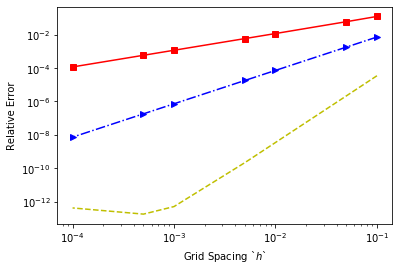

In [44]:
def f(x):
    y=np.square(x)*np.exp(x)
    return y

def F1(f,x,h): 
    y=(f(x+h)-f(x))/h
    return y

def F2(f,x,h): 
    y=(f(x+h)-f(x-h))/(2*h)
    return y

def F3(f,x,h): 
    y=(f(x-(2*h))-(8*f(x-h))+(8*f(x+h))-f(x+(2*h)))/(12*h)
    return y
x=1.0

f1_true = np.square(x)*np.exp(x)+(2*x*np.exp(x))
h=np.array([0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]);

err1=np.zeros(np.size(h))
err2=np.zeros(np.size(h))
err3=np.zeros(np.size(h))

for j in range(0,np.size(h)):
    
    err1[j]=abs(f1_true-F1(f,x,h[j]))/abs(f1_true) # Relative Error associated with F1 approx
    err2[j]=abs(f1_true-F2(f,x,h[j]))/abs(f1_true) # Relative Error associated with F2 approx
    err3[j]=abs(f1_true-F3(f,x,h[j]))/abs(f1_true) # Relative Error associated with F3 approx

plt.loglog(h,err1,'-sr',h,err2,'-.>b',h,err3, '--y' )
plt.xlabel('Grid Spacing `$h$`')
plt.ylabel('Relative Error')